In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import math

In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "nonlinearmodel_fit_table.csv"]
# model_hash = {}
# k = -1
# for model in models:
#     k += 1
#     model_hash[model] = string.ascii_uppercase[k]

# df = pd.DataFrame.from_dict(model_hash, orient='index')
# df.to_csv('../postmodel_derivatives/model_hash.csv', header=False)

In [4]:
rois = []
for model in models:
    df = pd.read_csv(tbpath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]

In [5]:
theta = "q"
df2 = pd.DataFrame(columns=[i.split('_fit_table.csv')[0] for i in models])
k = 0
for roi in rois:
#     print(roi)
    x = []
    for model in models:
        df = pd.read_csv(tbpath + model)
        try:
            x.append(df.loc[(df.roi==roi)&(df['quantile']==0.5), theta].values[0])
        except:
            print()
    if len(x)==len(models):
        k += 1
#         print(x)
        df2.loc[k] = x 

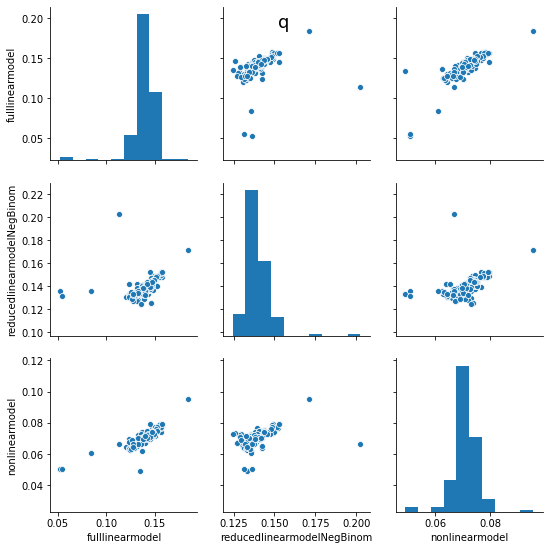

In [6]:
f = sns.pairplot(df2)
f.fig.suptitle(theta, fontsize=18)
plt.savefig(productpath + 'pairsplot_'+theta+'.png')